In [61]:
import seaborn as sns
import pandas as pd
import numpy as nm

In [49]:
import yfinance as yf

In [50]:
stock1 = "ADANIPOWER.NS"

In [62]:
type(stock1)

str

In [51]:
datax = yf.download(tickers=stock1,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [63]:
type(datax)

pandas.core.frame.DataFrame

In [64]:
datax.to_csv('adani.csv')

In [73]:
df = pd.read_csv('adani.csv')

In [74]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-02,33.250000,34.000000,32.750000,33.700001,33.700001,13410630
1,2017-11-03,34.000000,34.799999,33.599998,34.549999,34.549999,14245522
2,2017-11-06,34.299999,36.150002,34.299999,35.650002,35.650002,18837772
3,2017-11-07,35.700001,36.200001,33.250000,33.799999,33.799999,16667140
4,2017-11-08,34.250000,35.099998,33.500000,33.849998,33.849998,10348933


In [82]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [90]:
df1 = df['Close']

In [98]:
df1

0        33.700001
1        34.549999
2        35.650002
3        33.799999
4        33.849998
           ...    
1231    337.399994
1232    333.299988
1233    334.899994
1234    348.899994
1235    343.149994
Name: Close, Length: 1236, dtype: float64

<AxesSubplot:>

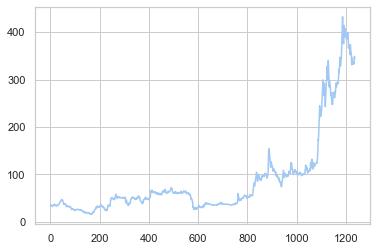

In [106]:
df1.plot()

In [109]:
df1.shape

(1236,)

In [118]:
# now we will scale our data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [119]:
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [122]:
df1.shape

(1236, 1)

In [123]:
training = int(len(df1)*0.65)
testing  = int(len(df1)*0.35)
train_data,test_data = df1[0:training,:],df1[training:len(df1),:1]

In [126]:
training,testing

(803, 432)

In [127]:
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax) , np.array(datay)    

In [128]:
time_step =100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [129]:
x_train

array([[0.04375974, 0.04579786, 0.04843544, ..., 0.02074092, 0.02062103,
        0.02337849],
       [0.04579786, 0.04843544, 0.04399952, ..., 0.02062103, 0.02337849,
        0.0197818 ],
       [0.04843544, 0.04399952, 0.04411941, ..., 0.02337849, 0.0197818 ,
        0.02158015],
       ...,
       [0.05311113, 0.05215202, 0.05203213, ..., 0.08967749, 0.08572114,
        0.08188466],
       [0.05215202, 0.05203213, 0.05191224, ..., 0.08572114, 0.08188466,
        0.08044599],
       [0.05203213, 0.05191224, 0.05323103, ..., 0.08188466, 0.08044599,
        0.08596091]])

<h1>Making of our stacked LSTM model

In [130]:
#reshaping 
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [133]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer ='adam')

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [135]:
from tabnanny import verbose


model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 372ms/step - loss: 0.0016 - val_loss: 0.1217
Epoch 2/100
11/11 [==============================] - 3s 248ms/step - loss: 6.4484e-04 - val_loss: 0.0602
Epoch 3/100
11/11 [==============================] - 3s 236ms/step - loss: 2.8429e-04 - val_loss: 0.0061
Epoch 4/100
11/11 [==============================] - 2s 216ms/step - loss: 2.0138e-04 - val_loss: 0.0052
Epoch 5/100
11/11 [==============================] - 2s 216ms/step - loss: 1.5641e-04 - val_loss: 0.0110
Epoch 6/100
11/11 [==============================] - 2s 214ms/step - loss: 1.4971e-04 - val_loss: 0.0047
Epoch 7/100
11/11 [==============================] - 2s 207ms/step - loss: 1.3959e-04 - val_loss: 0.0055
Epoch 8/100
11/11 [==============================] - 2s 226ms/step - loss: 1.3135e-04 - val_loss: 0.0047
Epoch 9/100
11/11 [==============================] - 2s 182ms/step - loss: 1.3441e-04 - val_loss: 0.0055
Epoch 10/100
11/11 [==============================] - 2s 20

In [136]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 25ms/step


In [137]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [138]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

45.27248511266405

In [139]:
math.sqrt(mean_squared_error(y_test,test_predict))

203.51236681398635

In [140]:
import tensorflow as tf

In [144]:
import matplotlib.pyplot as plt

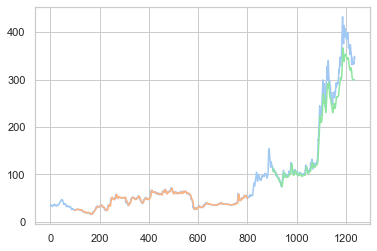

In [145]:
look_back= 100
trainpred = np.empty_like(df1)
trainpred[:,:] =np.nan
trainpred[look_back:len(train_predict)+look_back,:] = train_predict
testpred = np.empty_like(df1)
testpred[:,:] =np.nan
testpred[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpred)
plt.plot(testpred)
plt.show()
# so the orange colour shown here is the train ,test split segment 
# so the green colour shown here is the prediction output and the blue colour line is the original prediction 


<h1>prediction for future</h1>
<p>so we will be predicting it for the next 60 days 

In [146]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 92)

In [147]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [151]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>92):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.55592855 0.56863687 0.59705074 0.61731206 0.61095792 0.61047833
 0.59321426 0.59417336 0.59045681 0.59297446 0.5928546  0.62378613
 0.61407502 0.64656517 0.66490828 0.65028173 0.64320828 0.65052152
 0.6579547  0.66634698 0.65807456 0.66790553 0.66143145 0.66239063
 0.67677739 0.71214486 0.7349239  0.71574155 0.73468411 0.75074928
 0.77724495 0.79558806 0.75914156 0.75086922 0.7776046  0.78395874
 0.79055268 0.83179476 0.87519485 0.92075294 0.95072536 1.
 0.94820763 0.89905286 0.90648603 0.86332574 0.90828438 0.95552095
 0.94245294 0.92506894 0.8977341  0.9406546  0.93717777 0.92662749
 0.91487831 0.916317   0.90672583 0.88502575 0.92015349 0.89269872
 0.90252969 0.91787555 0.89929265 0.91307997 0.88754347 0.84174559
 0.85625222 0.84474284 0.84881912 0.85853015 0.81381131 0.80817648
 0.85037767 0.8569716  0.83898815 0.8186069  0.81848696 0.79462896
 0.75722335 0.7797626  0.79163171 0.76285819 0.7744875  0.75950129
 0.76753384 0.75986094 0.77196977 0.7621388  0.76597529 0.

In [152]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [153]:
len(df1)

1236

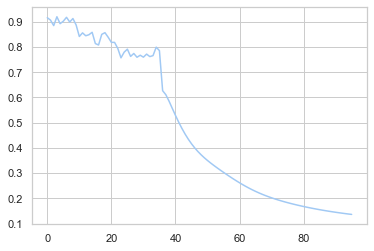

In [158]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])